# ICEBERG 데이터셋

모델링은 딥러닝이라서 안하고 EDA하고 plotly로 그림그리는 것 까지만 해보자

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

In [2]:
df = pd.read_json('iceberg_cut.json')
df

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0
...,...,...,...,...,...
595,4ce099f3,"[-14.16039, -18.242853, -16.756342, -13.332727...","[-26.800854, -23.922787, -24.862782, -23.70300...",36.4444,0
596,d439fa99,"[-20.918692, -20.473236, -17.346367, -16.66675...","[-26.788227, -23.571278, -22.594378, -22.59445...",33.9229,0
597,02530ece,"[-17.151072, -16.665699, -17.45594, -16.571938...","[-24.815405, -24.815405, -25.060165, -25.57131...",34.4721,1
598,56054fb5,"[-25.099049, -28.880238, -26.480793, -25.09923...","[-23.263643, -26.186266, -26.480793, -25.09923...",36.7033,0


# columns 설명

band_1, band_2 - the flattened image data. Each band has 75x75 pixel values in the list, so the list has 5625 elements. Note that these values are not the normal non-negative integers in image files since they have physical meanings - these are float numbers with unit being dB. Band 1 and Band 2 are signals characterized by radar backscatter produced from different polarizations at a particular incidence angle. The polarizations correspond to HH (transmit/receive horizontally) and HV (transmit horizontally and receive vertically). More background on the satellite imagery can be found here.

### id : 이미지의 id값
### band : flattened 이미지. 인공위성이 서로 다른 각도에서 찍은 사진
### inc_angle : 입사각(incidence angle)
### is_icegerg : 빙하(1) 빙하아님(0)

# EDA

### Null값 탐색 : null값을 'na'라고 표시해놨다고 데이터 주인이 note함
근데 내가 모델링할거는 아니니까 일단 놔두자

In [3]:
df[df['inc_angle']=='na']

df['inc_angle'] = df['inc_angle'].replace('na',0)

,id,band_1,band_2,inc_angle,is_iceberg
101,f9209504,"[-13.271194, -12.898959, -14.867657, -16.54327...","[-22.941357, -23.540695, -24.41008, -24.879778...",na,0
126,551856d8,"[-22.102318, -23.761854, -26.414414999999998, ...","[-26.414314, -30.252075, -26.730301, -27.39882...",na,0
142,89842932,"[-13.514271, -11.831821, -13.580964999999999, ...","[-27.900896, -26.317339, -23.394848, -24.97853...",na,0
145,f76458ab,"[-17.553728, -17.245392, -17.553867, -16.85065...","[-25.305712, -24.114067, -25.832432, -25.05414...",na,0
176,9847a428,"[-21.199528, -20.517969, -19.016716, -18.10160...","[-21.024048, -20.852085, -22.962326, -25.46114...",na,0
179,5a962d7c,"[-25.101696, -22.407778, -20.986565, -20.98656...","[-25.929546, -27.867802, -28.237524, -28.23752...",na,0
191,ba2b4c39,"[-27.965225, -27.965271, -25.372641, -24.57034...","[-27.595558, -26.572554, -26.900406, -28.75553...",na,0
278,1b4308b4,"[-19.929317, -20.218933, -20.518536, -18.85911...","[-24.040241, -25.006393, -24.509983, -25.26581...",na,0
286,94913c6b,"[-13.923383, -13.408596, -15.130878, -12.98200...","[-26.16581, -26.726467, -31.163525, -31.163609...",na,0
342,43637b8a,"[-24.97023, -25.481245, -23.810257, -21.699986...","[-23.595917, -22.787275, -23.182089, -22.78714...",na,0


In [91]:
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in df["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in df["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis],X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]],
                        axis=-1)

In [23]:
b1 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in df['band_1']])
b2 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in df['band_2']])

In [28]:
def plot_contour_2d(band1, band2, label):
    fig = tools.make_subplots(rows=1, cols=2,  specs=[[{'is_3d': True}, {'is_3d': True}]])
    fig.append_trace(dict(type='surface', z=band1, colorscale='RdBu',
                          scene='scene1', showscale=False), 1, 1)
    fig.append_trace(dict(type='surface', z=band2, colorscale='RdBu',
                          scene='scene2', showscale=False), 1, 2)


    fig['layout'].update(title='3D surface plot for "{}" (left is from band1, right is from band2)'.format(label), titlefont=dict(size=30), height=800, width=1200)

    py.iplot(fig)

    fig, ax = plt.subplots(1, 2, figsize=(16, 10))
    ax[0].imshow(X_band_1[num, :, :])
    ax[0].set_title('Image from band_1', fontsize=15)
    ax[1].imshow(X_band_2[num, :, :])
    ax[1].set_title('Image from band_2', fontsize=15)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



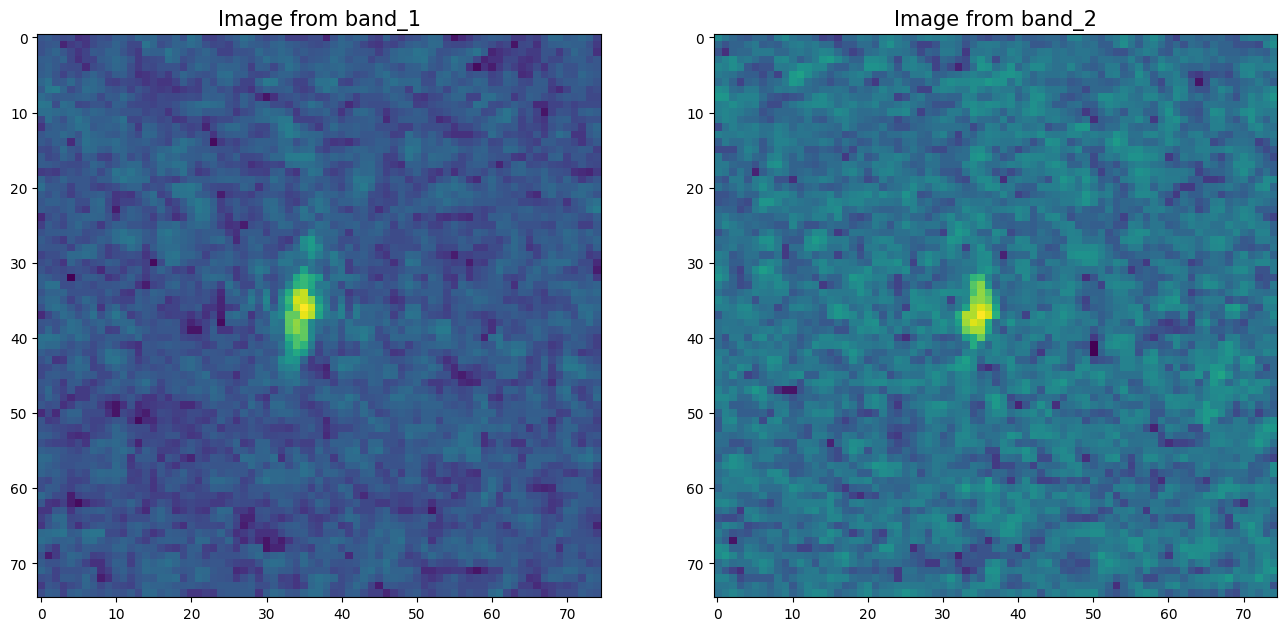

In [30]:
num = 0
label = 'iceberg' if (df['is_iceberg'].values[num] == 1) else'ship'
plot_contour_2d(X_band_1[num,:,:], X_band_2[num,:,:], label)